In [225]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns


# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [226]:
%cd "C:/Users/kirti/OneDrive/Desktop/Python Excel files"
cust_seg = pd.read_csv("Customer Acqusition.csv")
cust_seg



C:\Users\kirti\OneDrive\Desktop\Python Excel files


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [227]:
cust_seg.set_index("No", inplace = True)
cust_seg

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [228]:
spend  = pd.read_csv("spend.csv")
spend.set_index('Sl No:', inplace = True)
spend

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1496,A67,4-Feb-06,BUS TICKET,356872.73
1497,A68,25-Mar-06,BUS TICKET,204971.10
1498,A69,31-Mar-06,BUS TICKET,50449.44


In [229]:
spend.Month = pd.to_datetime(spend.Month)

In [230]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1 to 1500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 58.6+ KB


In [231]:
repayment= pd.read_csv("Repayment.csv")
repayment.set_index('SL No:', inplace = True)
repayment.head()

,Customer,Month,Amount,Unnamed: 4
SL No:,,,,
NaN,A1,12-Jan-04,495414.75,NaN
2.0,A1,3-Jan-04,245899.02,NaN
3.0,A1,15-Jan-04,259490.06,NaN
4.0,A1,25-Jan-04,437555.12,NaN
5.0,A1,17-Jan-05,165972.88,NaN


In [232]:
repayment.Month = pd.to_datetime(repayment.Month)
repayment.dtypes

Customer              object
Month         datetime64[ns]
Amount               float64
Unnamed: 4           float64
dtype: object

## Q1 a. In case age is less than 18, replace it with mean of age values.

In [233]:
cust_seg['Age'] = np.where(cust_seg['Age']<18, cust_seg['Age'].mean(),  cust_seg['Age'])

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [234]:
cust_spend = pd.merge(cust_seg,spend, how= 'left', on = 'Customer')

In [235]:
cust_spend ['Amount'] = np.where(table1['Amount']>table1['Limit'], table1['Limit']/2,table1['Amount'])

In [236]:
cust_spend 

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


## c Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [237]:
Cust_repayment = pd.merge(repayment,cust_seg, how = "left" , on = "Customer")

In [238]:
Cust_repayment['Amount'] = np.where(table2['Amount']>table2['Limit'], table2['Limit'],table2['Amount'])

## 2. From the above dataset create the following summaries:
## a. How many distinct customers exist?

In [239]:
len(cust_seg['Customer'].unique())

100

In [240]:
cust_seg['Customer'].value_counts()

Customer
A1      1
A64     1
A74     1
A73     1
A72     1
       ..
A31     1
A30     1
A29     1
A28     1
A100    1
Name: count, Length: 100, dtype: int64

## b. How many distinct categories exist?


In [241]:
len(cust_seg['Segment'].unique())

5

## c. What is the average monthly spend by customers?






In [242]:
spend["Month"] = pd.to_datetime(spend["Month"],format = "%d-%b-%y")
spend["Year"] = spend["Month"].dt.year
spend["month_of_year"] = spend["Month"].dt.month
spend['Month_Name'] = spend['Month'].dt.strftime('%b')
spend

,Customer,Month,Type,Amount,Year,month_of_year,Month_Name
Sl No:,,,,,,,
1,A1,2004-01-12,JEWELLERY,485470.80,2004,1,Jan
2,A1,2004-01-03,PETRO,410556.13,2004,1,Jan
3,A1,2004-01-15,CLOTHES,23740.46,2004,1,Jan
4,A1,2004-01-25,FOOD,484342.47,2004,1,Jan
5,A1,2005-01-17,CAMERA,369694.07,2005,1,Jan
...,...,...,...,...,...,...,...
1496,A67,2006-02-04,BUS TICKET,356872.73,2006,2,Feb
1497,A68,2006-03-25,BUS TICKET,204971.10,2006,3,Mar
1498,A69,2006-03-31,BUS TICKET,50449.44,2006,3,Mar


In [243]:
Avg_month_spend = pd.DataFrame(spend.groupby(['Customer','Month_Name'])['Amount'].mean())
Avg_month_spend

Amount
Customer Month_Name               
A1       Apr         261649.250000
         Aug         344372.100000
         Feb         175235.690000
         Jan         372762.587143
         May         361141.310000
...                            ...
A95      Jan         240401.500000
A96      Jan          54729.660000
A97      Jan         139018.260000
A98      Jan         284521.060000
A99      Jan          90184.220000

[578 rows x 1 columns]

## d. What is the average monthly repayment by customers?

In [244]:
repayment["Month"] = pd.to_datetime(repayment["Month"],format = "%d-%b-%y")
repayment["Year"] = repayment["Month"].dt.year
repayment["month_of_year"] = repayment["Month"].dt.month
repayment['Month_Name'] = repayment['Month'].dt.strftime('%b')
repayment

,Customer,Month,Amount,Unnamed: 4,Year,month_of_year,Month_Name
SL No:,,,,,,,
NaN,A1,2004-01-12,495414.75,NaN,2004.0,1.0,Jan
2.0,A1,2004-01-03,245899.02,NaN,2004.0,1.0,Jan
3.0,A1,2004-01-15,259490.06,NaN,2004.0,1.0,Jan
4.0,A1,2004-01-25,437555.12,NaN,2004.0,1.0,Jan
5.0,A1,2005-01-17,165972.88,NaN,2005.0,1.0,Jan
...,...,...,...,...,...,...,...
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [245]:
Avg_month_repayment = pd.DataFrame(repayment.groupby(['Customer','Month_Name'])['Amount'].mean())
Avg_month_repayment

Amount
Customer Month_Name               
A1       Apr         254474.580000
         Feb         156374.760000
         Jan         343972.327143
         Jul         297176.740000
         Nov         285729.090000
...                            ...
A95      Jan         369405.960000
A96      Jan         310992.300000
A97      Jan         121874.900000
A98      Jan         337815.570000
A99      Jan          25682.730000

[558 rows x 1 columns]

## 2e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?





In [246]:
cust_spend_repayment = pd.merge(left = cust_spend, right = Cust_repayment, how = 'inner', left_on = 'Customer', right_on = 'Customer')
cust_spend_repayment = cust_spend_repayment.rename(columns = {'Amount_x' : 'spend_Amount', 'Amount_y' : 'repay_Amount'})
cust_spend_repayment.head()

,Customer,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,Month_x,Type,spend_Amount,Month_y,repay_Amount,Unnamed: 4,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [247]:
cust_spend_repayment['year'] = pd.DatetimeIndex(cust_spend_repayment['Month_x']).year
cust_spend_repayment['Month'] = cust_spend_repayment['Month_x'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))


In [248]:
interest_amt = cust_spend_repayment.groupby(['year', 'Month']).agg({'spend_Amount':'sum','repay_Amount':'sum'})
interest_amt

spend_Amount  repay_Amount
year Month                            
2004 Apr    9.049341e+07  1.086926e+08
     Feb    9.842368e+07  1.190423e+08
     Jan    1.143343e+09  1.238320e+09
     Mar    5.277091e+07  5.672043e+07
     May    5.841022e+07  7.263925e+07
     Nov    3.125216e+07  5.105995e+07
     Sep    6.507525e+07  6.290461e+07
2005 Apr    1.198022e+08  1.285438e+08
     Aug    1.051836e+08  1.134054e+08
     Dec    3.170860e+07  5.857031e+07
     Feb    6.792701e+08  7.965904e+08
     Jan    1.511804e+08  1.156593e+08
     Jul    4.636628e+07  5.838608e+07
     Jun    2.325435e+08  2.228315e+08
     May    5.905389e+08  6.434467e+08
     Nov    1.914965e+08  1.793536e+08
     Oct    3.077381e+07  4.636858e+07
     Sep    3.844917e+07  4.662630e+07
2006 Apr    3.192713e+08  3.658929e+08
     Aug    8.355435e+07  9.112033e+07
     Dec    4.447626e+07  5.281360e+07
     Feb    1.480151e+08  1.466080e+08
     Jan    4.455873e+07  5.141642e+07
     Jul    1.518317e+08  1.386598e+08
     Jun    5.949566e+07  6.453334e+07
     Mar    7.082175e+08  8.117851e+08
     May    2.047262e+08  2.175065e+08
     Nov    9.331193e+07  1.205240e+08
     Oct    7.063433e+07  8.105089e+07
     Sep    6.281231e+07  8.424755e+07

In [249]:
interest_amt["Profit"] = interest_amt.repay_Amount - interest_amt.spend_Amount
interest_amt["interest"] = interest_amt.Profit * 2.9/100
interest_amt

spend_Amount  repay_Amount        Profit      interest
year Month                                                        
2004 Apr    9.049341e+07  1.086926e+08  1.819921e+07  5.277770e+05
     Feb    9.842368e+07  1.190423e+08  2.061862e+07  5.979401e+05
     Jan    1.143343e+09  1.238320e+09  9.497695e+07  2.754332e+06
     Mar    5.277091e+07  5.672043e+07  3.949520e+06  1.145361e+05
     May    5.841022e+07  7.263925e+07  1.422903e+07  4.126419e+05
     Nov    3.125216e+07  5.105995e+07  1.980779e+07  5.744259e+05
     Sep    6.507525e+07  6.290461e+07 -2.170637e+06 -6.294846e+04
2005 Apr    1.198022e+08  1.285438e+08  8.741586e+06  2.535060e+05
     Aug    1.051836e+08  1.134054e+08  8.221842e+06  2.384334e+05
     Dec    3.170860e+07  5.857031e+07  2.686171e+07  7.789895e+05
     Feb    6.792701e+08  7.965904e+08  1.173203e+08  3.402289e+06
     Jan    1.511804e+08  1.156593e+08 -3.552100e+07 -1.030109e+06
     Jul    4.636628e+07  5.838608e+07  1.201980e+07  3.485742e+05
     Jun    2.325435e+08  2.228315e+08 -9.712043e+06 -2.816492e+05
     May    5.905389e+08  6.434467e+08  5.290783e+07  1.534327e+06
     Nov    1.914965e+08  1.793536e+08 -1.214290e+07 -3.521440e+05
     Oct    3.077381e+07  4.636858e+07  1.559477e+07  4.522484e+05
     Sep    3.844917e+07  4.662630e+07  8.177138e+06  2.371370e+05
2006 Apr    3.192713e+08  3.658929e+08  4.662156e+07  1.352025e+06
     Aug    8.355435e+07  9.112033e+07  7.565976e+06  2.194133e+05
     Dec    4.447626e+07  5.281360e+07  8.337342e+06  2.417829e+05
     Feb    1.480151e+08  1.466080e+08 -1.407167e+06 -4.080785e+04
     Jan    4.455873e+07  5.141642e+07  6.857682e+06  1.988728e+05
     Jul    1.518317e+08  1.386598e+08 -1.317185e+07 -3.819837e+05
     Jun    5.949566e+07  6.453334e+07  5.037675e+06  1.460926e+05
     Mar    7.082175e+08  8.117851e+08  1.035676e+08  3.003461e+06
     May    2.047262e+08  2.175065e+08  1.278023e+07  3.706268e+05
     Nov    9.331193e+07  1.205240e+08  2.721212e+07  7.891514e+05
     Oct    7.063433e+07  8.105089e+07  1.041655e+07  3.020801e+05
     Sep    6.281231e+07  8.424755e+07  2.143524e+07  6.216219e+05

## f. What are the top 5 product types?


In [250]:
table1[['Type','Amount']].groupby('Type').sum().sort_values('Amount', ascending = False).head()

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


##  Which city is having maximum spend

In [251]:
table1[['City','Amount']].groupby('City').sum().sort_values('Amount', ascending = False).head(1)

,Amount
City,
COCHIN,45963513.5


## h. Which age group is spending more money?

In [252]:
cust_spend.Age = cust_spend.Age.astype(int)
cust_spend.dtypes

Customer            object
Age                  int32
City                object
Product             object
Limit              float64
Company             object
Segment             object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [253]:
cust_spend["Age_Group"]=np.where(((cust_spend.Age>=18) & (cust_spend.Age<25)),"Youth",
                                     np.where(((cust_spend.Age>=25) & (cust_spend.Age<45)),"Adult","Senior" ))

In [ ]:
cust_spend.cut(cust_spend["Age_Group"],[0,19,26,46,100] , labels[

In [254]:
round(cust_spend.groupby("Age_Group").agg({'Amount':'sum'}).sort_values("Amount",ascending=False))

,Amount
Age_Group,
Senior,111701138.0
Adult,93399451.0
Youth,14680497.0


In [255]:
table1[['Age','Amount']].groupby('Age').sum().sort_values('Amount', ascending = False).head(1)

,Amount
Age,
28.0,17365270.23


## i. Who are the top 10 customers in terms of repayment?

In [256]:
table2[['Customer','Amount']].groupby('Customer').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.



In [268]:
cust_spend = pd.merge(cust_seg,spend, how= 'left', on = 'Customer')

In [269]:
city_type_spend = pd.pivot_table(data = cust_spend, index = ["City",'Year'],columns = "Product",aggfunc = "sum",values = "Amount")


In [270]:
city_type_spend

Product                 Gold     Platimum      Silver
City       Year                                      
BANGALORE  2004   9289878.54   6046763.93  6773901.65
           2005  12892362.99   7784194.68  3936068.22
           2006  12030611.09   5620904.86  4967945.66
BOMBAY     2004   6987853.53   5199581.00  3061805.08
           2005   8983018.28   5134074.48  2368375.97
           2006   7917144.31   7547549.72  3628864.37
CALCUTTA   2004   7477140.98   5961165.93  3321963.10
           2005  10303355.80   8810284.03  1285609.11
           2006  11167532.77  11305526.03  4783182.26
CHENNAI    2004   1059618.50   5558572.68  1156129.37
           2005   3740945.58   8868435.43  1000540.48
           2006   2704288.62   6921130.79  1665326.62
COCHIN     2004   7315850.15   8472832.23  4587738.70
           2005  12110613.03  10856722.82  2619231.25
           2006  10499142.38  12453968.83  4579249.87
DELHI      2004   2806495.00   1565199.90  4293224.28
           2005   1964845.27   2068490.16  2515127.59
           2006   2957103.32    764247.73  4581831.29
PATNA      2004   2072567.90   1113069.60  3398795.65
           2005   3252615.77   2883231.07  5244763.90
           2006   2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004   2415102.84   3761433.87   795897.19
           2005   1240375.85   7186762.35  1445540.63
           2006   2735710.87   4174473.45  2005942.36

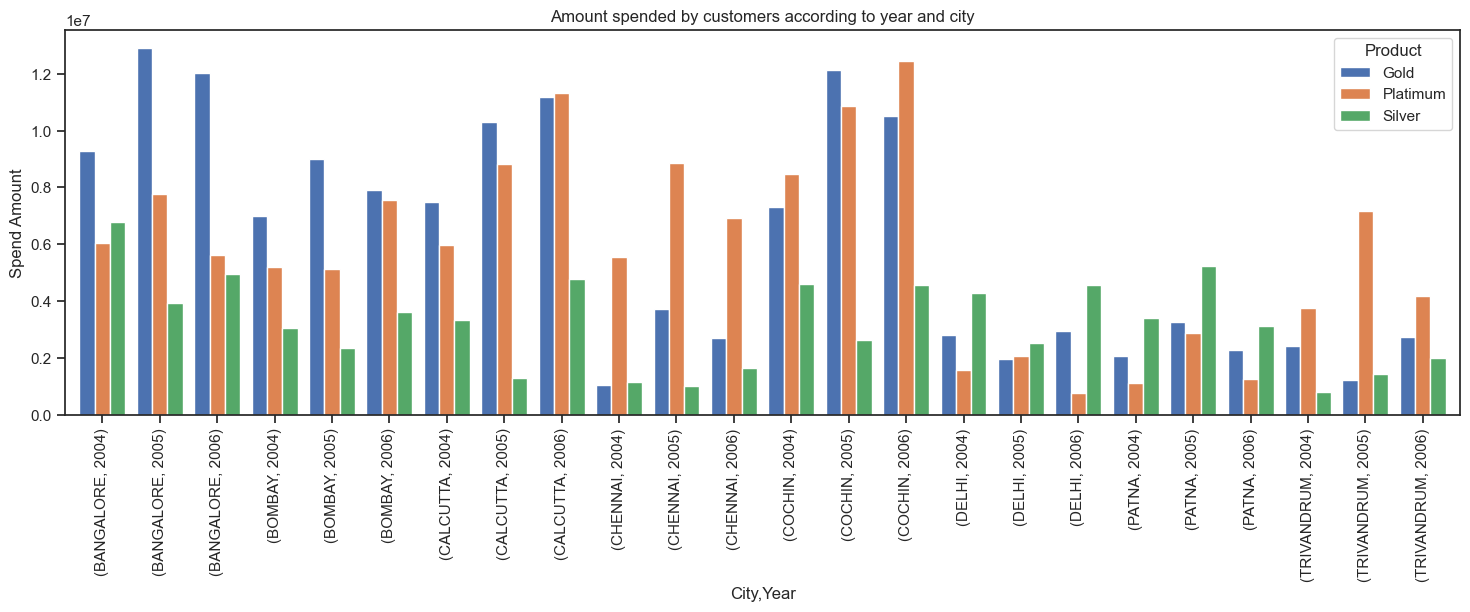

In [271]:
city_type_spend.plot(kind = "bar",figsize = (18,5),width = 0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

## 4. Create graphs for


## a. Monthly comparison of total spends, city wise

In [272]:
city_wise2 = cust_spend[['City','month_of_year','Amount']].groupby(['City','month_of_year']).sum()

In [273]:
monthly_city_spend = pd.pivot_table(data =city_wise2, index = ["City"],columns = 'month_of_year', aggfunc = "sum",values = "Amount")
monthly_city_spend

month_of_year,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,17782487.66,9875860.87,10765773.46,6182081.72,10743668.90,1382739.41,3737413.09,1552898.45,1306412.01,1855076.43,3435745.65,722473.97
BOMBAY,10681854.60,7813534.61,9857699.82,3726382.34,6974931.87,1486412.18,612457.59,1066744.75,1835082.87,1047561.39,5120665.55,604939.17
CALCUTTA,14163384.38,11449586.70,10076115.86,6883832.96,7868030.30,2693423.54,2323261.43,2179294.85,2208767.98,622463.42,3490771.91,456826.68
CHENNAI,7649568.68,5866408.35,4413870.52,3231144.38,4422623.36,1903803.90,1186667.37,681577.16,1591669.63,156247.17,1347779.28,223628.27
COCHIN,18692606.60,9459367.08,10733411.24,7070107.83,9912248.75,2738031.53,1758023.02,2582997.08,1739644.69,1668786.53,5128350.59,2011774.32
DELHI,7373794.37,3072043.85,3386628.30,2845176.75,2638193.66,828262.78,488399.04,475893.81,245802.04,64615.46,1130584.99,967169.49
PATNA,7388720.78,3466726.76,3795753.30,2786278.83,3476601.00,1653183.92,191003.23,813559.15,70329.95,329537.34,413677.87,223902.41
TRIVANDRUM,5688758.54,4459329.30,3855833.54,2775772.32,4631877.09,828576.89,960551.29,561400.55,215826.30,285581.92,856809.41,640922.26


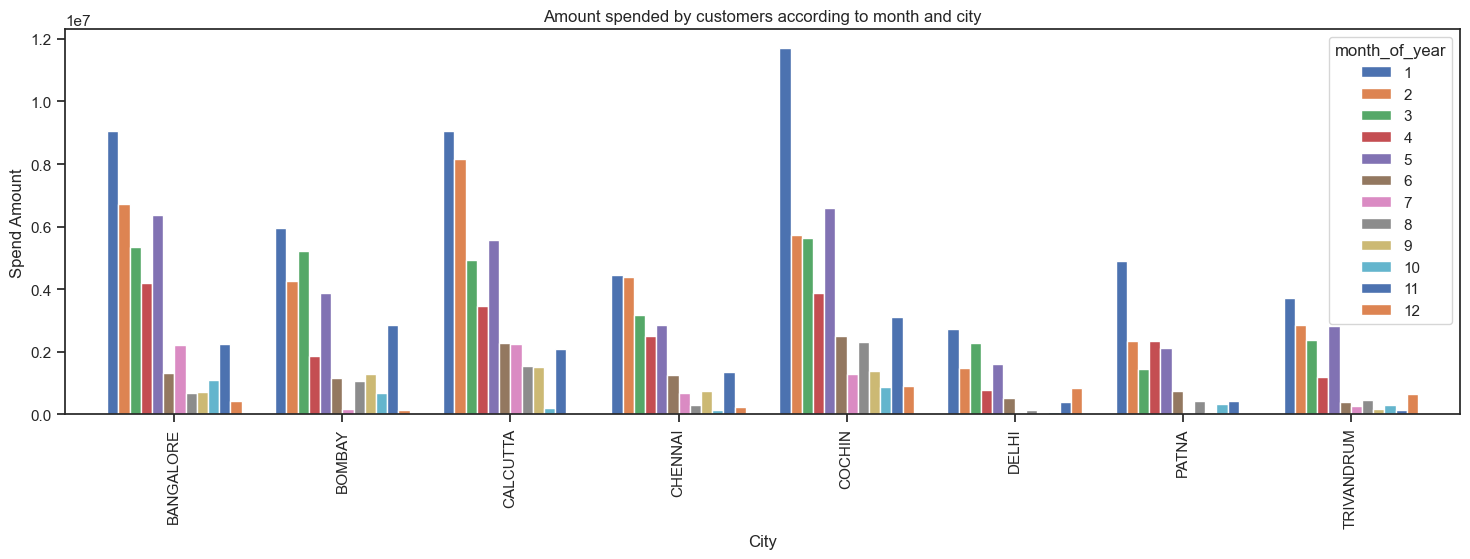

In [262]:
monthly_city_spend.plot(kind = "bar",figsize = (18,5),width = 0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to month and city")
plt.show()

## b. Comparison of yearly spend on air tickets

In [274]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Year,month_of_year,Month_Name
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004,1,Jan
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004,1,Jan
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004,1,Jan
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004,1,Jan
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005,1,Jan


In [275]:
yearly_spend = pd.pivot_table(data=cust_spend[cust_spend.Type=='AIR TICKET'],index="Type",columns=['Year'],values='Amount',aggfunc='sum')
yearly_spend


Year,2004,2005,2006
Type,,,
AIR TICKET,8370914.59,14495718.73,10088812.1


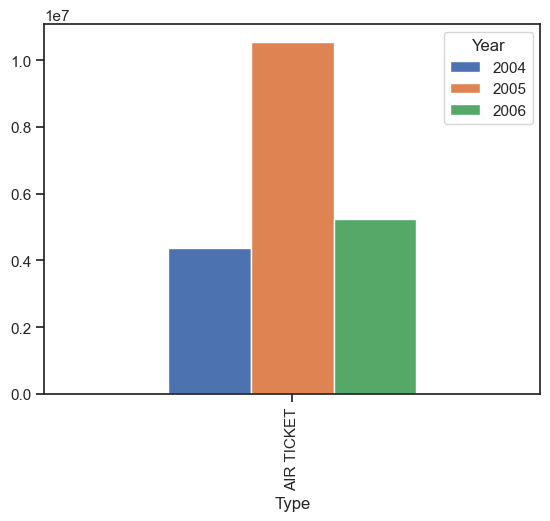

In [264]:
yearly_spend.plot(kind='bar')
plt.show()

## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend

In [276]:
monthly_product_spends = cust_spend[["month_of_year","Product","Amount"]].groupby(["Product","month_of_year"]).sum()
monthly_product_spends

Amount
Product  month_of_year             
Gold     1              32413831.83
         2              24779179.55
         3              19256972.48
         4              13170572.59
         5              21548169.76
         6               6538862.64
         7               5167416.37
         8               4954030.42
         9               3816887.62
         10              3018223.38
         11              9203267.46
         12              2332940.96
Platimum 1              35212526.96
         2              22081411.74
         3              22639437.70
         4              12798498.34
         5              19380600.97
         6               4756418.62
         7               3695098.37
         8               3892605.15
         9               3411278.13
         10              2517051.91
         11              7977852.48
         12              2951972.85
Silver   1              21794816.82
         2               8602266.23
         3              14988675.86
         4               9531706.20
         5               9739404.20
         6               2219152.89
         7               2395261.32
         8               1067730.23
         9               1985369.72
         10               494594.37
         11              3743265.31
         12               566722.76

In [129]:
month_product_spends = pd.pivot_table(data = monthly_product_spends, index = ["Product"],columns = 'month_of_year',aggfunc = "sum",values = "Amount")
month_product_spends

month_of_year,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


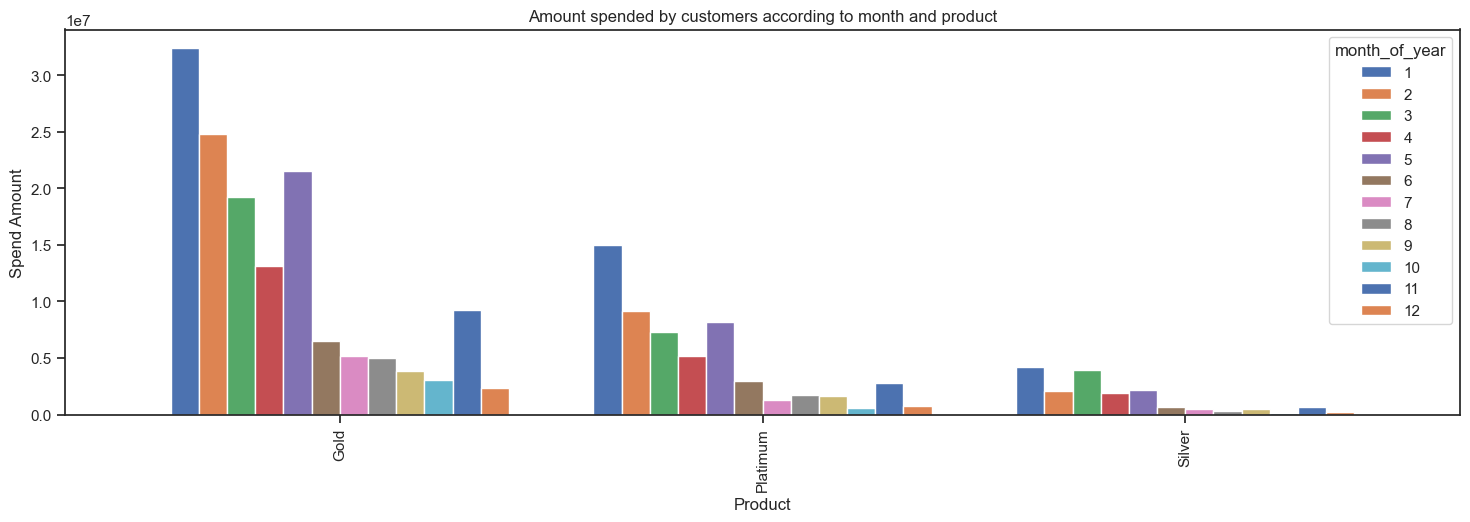

In [130]:
month_product_spends.plot(kind = "bar",figsize = (18,5),width = 0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to month and product")
plt.show()

## 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [145]:
Cust_repayment.head()

,Customer,Month,Amount,Unnamed: 4,Age,City,Product,Limit,Company,Segment,yearly,year,Mon_Year,Month_name,Month_Name
0,A1,2004-01-12,495414.75,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004.0,2004.0,Jan,Jan,Jan
1,A1,2004-01-03,245899.02,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004.0,2004.0,Jan,Jan,Jan
2,A1,2004-01-15,259490.06,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004.0,2004.0,Jan,Jan,Jan
3,A1,2004-01-25,437555.12,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004.0,2004.0,Jan,Jan,Jan
4,A1,2005-01-17,165972.88,NaN,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005.0,2005.0,Jan,Jan,Jan


In [146]:
def top10Customers(product_category,time_period):
    return Cust_repayment.loc[(Cust_repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [147]:
top10Customers('Gold','yearly')

,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005.0,4276860.55
55,A44,DELHI,Gold,2005.0,4165317.77
58,A45,COCHIN,Gold,2005.0,4042447.57
52,A43,BANGALORE,Gold,2005.0,4006956.60
13,A13,BANGALORE,Gold,2005.0,3757673.00
65,A61,COCHIN,Gold,2006.0,3744127.41
61,A60,CALCUTTA,Gold,2005.0,3742856.10
14,A13,BANGALORE,Gold,2006.0,3477314.89
38,A29,CALCUTTA,Gold,2006.0,3434298.00
35,A28,TRIVANDRUM,Gold,2006.0,3376614.65
